In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(
    'Seasons_Stats.csv')

In [4]:
del df['blanl']
del df['blank2']
print(df.shape)

(24691, 51)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 51 columns):
Unnamed: 0    24691 non-null int64
Year          24624 non-null float64
Player        24624 non-null object
Pos           24624 non-null object
Age           24616 non-null float64
Tm            24624 non-null object
G             24624 non-null float64
GS            18233 non-null float64
MP            24138 non-null float64
PER           24101 non-null float64
TS%           24538 non-null float64
3PAr          18839 non-null float64
FTr           24525 non-null float64
ORB%          20792 non-null float64
DRB%          20792 non-null float64
TRB%          21571 non-null float64
AST%          22555 non-null float64
STL%          20792 non-null float64
BLK%          20792 non-null float64
TOV%          19582 non-null float64
USG%          19640 non-null float64
OWS           24585 non-null float64
DWS           24585 non-null float64
WS            24585 non-null float64
WS/48   

In [6]:
df = df.dropna()

In [7]:
print(df.shape)

(14585, 51)


In [67]:
df['Year'] = df.Year.astype('int64')
df['Age'] = df.Age.astype('int64')
df['PTS'] = df.Age.astype('int64')
df['3P'] = df.Age.astype('int64')
df['3PA'] = df.Age.astype('int64')
df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5730,5730,1980,Tiny Archibald*,PG,31,BOS,80.0,80.0,2864.0,15.3,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,31
5748,5748,1980,Larry Bird*,PF,23,BOS,82.0,82.0,2955.0,20.5,...,0.836,216.0,636.0,852.0,370.0,143.0,53.0,263.0,279.0,23
5781,5781,1980,M.L. Carr,SF,29,BOS,82.0,7.0,1994.0,14.6,...,0.739,106.0,224.0,330.0,156.0,120.0,36.0,143.0,214.0,29
5786,5786,1980,Don Chaney,SG,33,BOS,60.0,0.0,523.0,7.8,...,0.762,31.0,42.0,73.0,38.0,31.0,11.0,33.0,80.0,33
5802,5802,1980,Dave Cowens*,C,31,BOS,66.0,55.0,2159.0,14.8,...,0.779,126.0,408.0,534.0,206.0,69.0,61.0,108.0,216.0,31


In [68]:
df_3pa = df[['3PA'] + ['Year']]\
    .groupby('Year').sum()
df_3pa.head()



,3PA
Year,
1980,313
1981,315
1982,7606
1983,8146
1984,6813


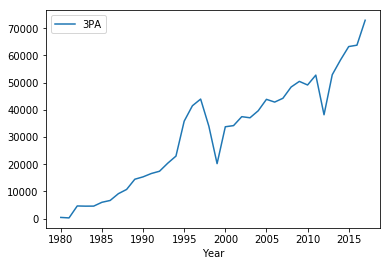

In [29]:
df_3pa.plot()

На данном графике отражена динамика по годам общего количества попыток трёхочкового броска. Plot был выбран, потому, что целью визуализации является сравнение показателей "во времени".

In [69]:
df_3p_per = df[['3P'] + ['3PA'] + ['Year']]\
    .groupby('Year').sum()
df_3p_per = df_3p_per.loc[(df_3p_per.index.get_level_values(0).isin([1985, 1995, 2005, 2015]))]
df_3p_per.head()

,3P,3PA
Year,,
1985,7314,7314
1995,10284,10284
2005,12612,12612
2015,14655,14655


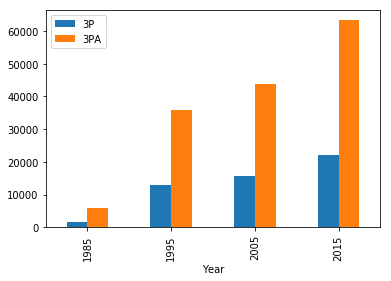

In [38]:
df_3p_per.plot(kind='bar')

Столбчатая диаграмма выбрана для сравнения между признаками. Сравнивается количество попыток трёхочкового броска и реализованных трехочковых бросков. Плюс отражена динамика во времени, в 1985, 1995, 2005, 2015 годах.

Text(0, 0.5, 'Players')

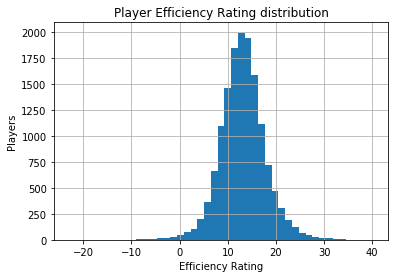

In [49]:
ax = df.PER.hist(bins = 45)
ax.set_title('Player Efficiency Rating distribution')
ax.set_xlabel('Efficiency Rating')
ax.set_ylabel('Players')

Гистограмма была выбрана для визуализации распредения. На графике отражено распределение по признаку "рейтинг эффективности игрока" среди всех игроков за весь период записанный в датафрейм (1980-2017) 

In [52]:
import seaborn as sns

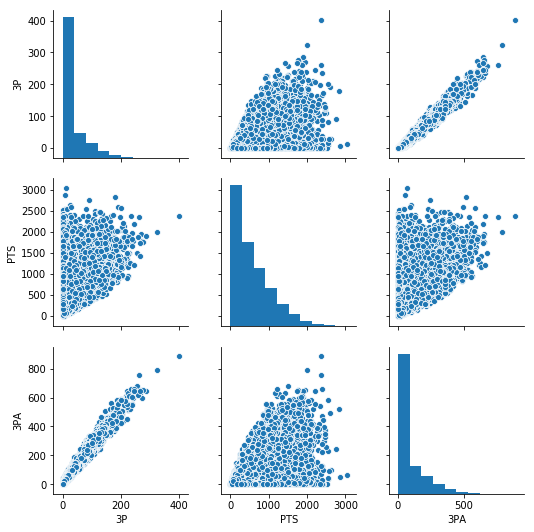

In [54]:
sns_plot = sns.pairplot(
    df[['3P', 'PTS', '3PA']]);
sns_plot

pair plot позволяет визуализировать, как связаны различные показатели. В данном случае это количество набранных очков, количество попыток трехочкового броска и реализованных трехочковых бросков.

In [72]:
position_teams_points = df.loc[(df['Year'] == 2017) & (df['Pos'] != 'PF-C')]

position_teams_points = position_teams_points.pivot_table(
                        index='Tm', 
                        columns='Pos', 
                        values='PTS', 
                        aggfunc=sum).fillna(0).applymap(int)

position_teams_points

Pos,C,PF,PG,SF,SG
Tm,,,,,
ATL,56,144,85,139,116
BOS,82,80,71,77,69
BRK,54,162,125,94,107
CHI,53,77,101,74,114
CHO,23,126,111,23,127
CLE,96,53,77,176,145
DAL,111,134,223,46,85
DEN,47,99,54,122,87
DET,23,71,88,72,70


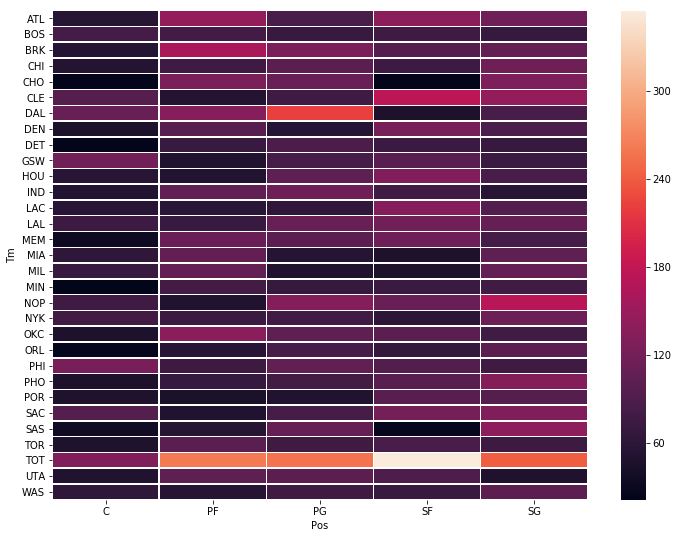

In [84]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9
sns.heatmap(position_teams_points, annot=False, 
            linewidths=0.5)

Heat Map выбран для распределения количества набранных игроками очков в зависимости от их позиции в игре и команды. График позволил выявить аномалии: в некоторых командах игроки набирают много очков на нетипичных для этого игровых позициях.